In [48]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
data_path=r'D:\users\moaz\Dataset\archive (20)'
os.listdir(data_path)

['Testing', 'Training']

In [3]:
def extract_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            raise ValueError(f"Image could not be loaded: {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        return img
    except Exception as e:
        print(f"Error processing image {path}: {e}")
        return None

In [4]:
xts, yts, xt, yt = [], [], [], []

for sets in os.listdir(data_path):
    if sets == 'Testing':
        for label in tqdm(os.listdir(os.path.join(data_path, sets))):
            for i in os.listdir(os.path.join(data_path, sets, label)):
                image_path = os.path.join(data_path, sets, label, i)
                img = extract_image(image_path)
                if img is not None:
                    xts.append(img)
                    yts.append(label)
                
    elif sets == 'Training':            
        for label in tqdm(os.listdir(os.path.join(data_path, sets))):
            for i in os.listdir(os.path.join(data_path, sets, label)):
                image_path = os.path.join(data_path, sets, label, i)
                img = extract_image(image_path)
                if img is not None:
                    xt.append(img)
                    yt.append(label)



00%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:05<00:00, 16.39s/it]

In [5]:
def complete_set(x,y):
    x=np.array(x)
    y=np.array(y)
    index=np.arange(len(x))
    np.random.shuffle(index)
    x=x[index]
    y=y[index]
    return x,y

In [6]:
x_train,y_train=complete_set(xt,yt)

In [7]:
x_test,y_test=complete_set(xts,yts)

In [8]:
x_train.shape

(5712, 180, 180, 3)

In [9]:
x_train[1000]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

Text(0.5, 1.0, 'notumor')

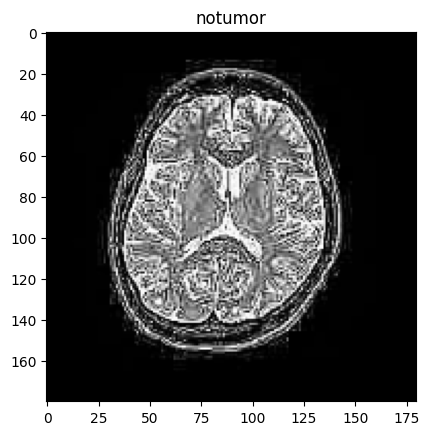

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(y_train[0])

Text(0.5, 1.0, 'meningioma')

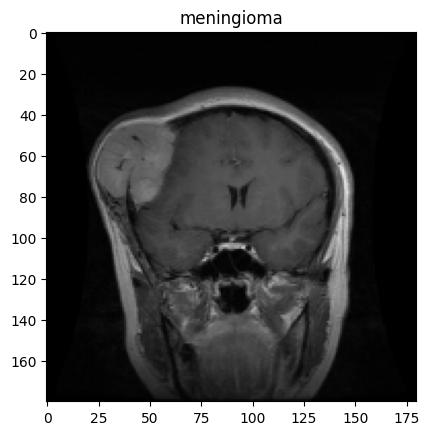

In [11]:
plt.imshow(x_train[300])
plt.title(y_train[300])

In [12]:
def y_encode(y):
    le=LabelEncoder()
    y_encoded=to_categorical(le.fit_transform(y),num_classes=4)
    return y_encoded

In [13]:
sets=np.array_split(x_train,6)

In [14]:
sets[0]=sets[0].astype('float32')/255

In [15]:
sets[1]=sets[1].astype('float32')/255

In [16]:
sets[2]=sets[2].astype('float32')/255

In [17]:
sets[3]=sets[3].astype('float32')/255

In [18]:
sets[4]=sets[4].astype('float32')/255

In [19]:
sets[5]=sets[5].astype('float32')/255

In [21]:
x_train_scaled=np.concatenate(sets)

In [20]:
x_test_scaled=x_test.astype('float32')/255

In [22]:
y_train_encoded=y_encode(y_train)

In [23]:
y_test_encoded=y_encode(y_test)

In [24]:
y_train_encoded[:5]

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [25]:
x_test_scaled.shape,x_train_scaled.shape,y_test_encoded.shape,y_train_encoded.shape

((1311, 180, 180, 3), (5712, 180, 180, 3), (1311, 4), (5712, 4))

In [57]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

D:\users\moaz\python\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,Rescaling
from tensorflow.keras import regularizers
model=keras.models.Sequential()

model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         123,908 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,492 (576.14 KB)

 Trainable params: 147,492 (576.14 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])

In [31]:
from tensorflow.keras.utils import Sequence
import numpy as np

class DataGenerator(Sequence):
    def __init__(self, x, y, batch_size):
        self.x = x
        self.y = y
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        x_batch = self.x[index * self.batch_size:(index + 1) * self.batch_size]
        y_batch = self.y[index * self.batch_size:(index + 1) * self.batch_size]
        return x_batch, y_batch
train_generator = DataGenerator(x_train_scaled, y_train_encoded, batch_size=16)
validation_generator = DataGenerator(x_test_scaled, y_test_encoded, batch_size=16)

In [41]:
hist=model.fit(train_generator,epochs=5,validation_data=(validation_generator))

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 174s 485ms/step - Accuracy: 0.7700 - loss: 0.6003 - val_Accuracy: 0.8192 - val_loss: 0.4461
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 162s 455ms/step - Accuracy: 0.8915 - loss: 0.3046 - val_Accuracy: 0.8436 - val_loss: 0.4048
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 164s 460ms/step - Accuracy: 0.9341 - loss: 0.1878 - val_Accuracy: 0.9123 - val_loss: 0.2842
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 168s 471ms/step - Accuracy: 0.9557 - loss: 0.1239 - val_Accuracy: 0.9291 - val_loss: 0.2015
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 164s 458ms/step - Accuracy: 0.9751 - loss: 0.0686 - val_Accuracy: 0.9512 - val_loss: 0.1344


In [42]:
acc=model.evaluate(x_test_scaled,y_test_encoded)
print(f"Acc = %{round(acc[1]*100)}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - Accuracy: 0.9516 - loss: 0.1584
Acc = %95


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step


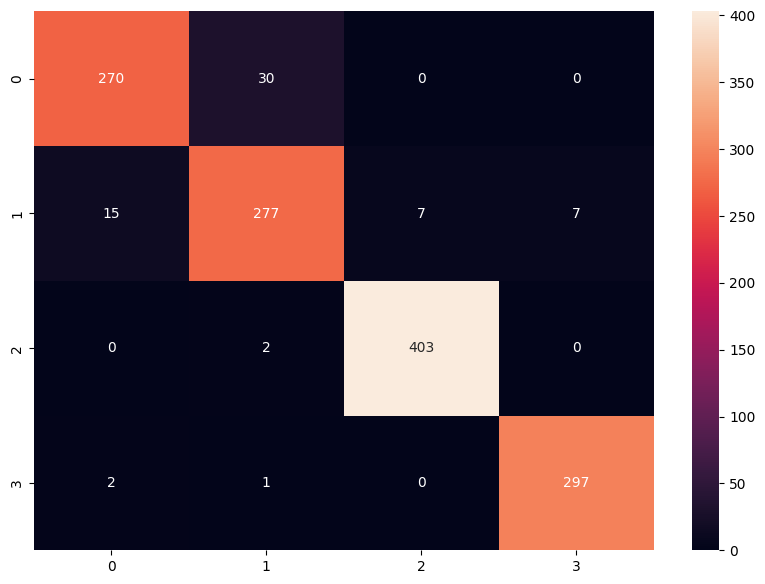

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
le=LabelEncoder()
y_test_labeld=le.fit_transform(y_test)
pred=model.predict(x_test_scaled)
y_pred=[np.argmax(i) for i in pred]
cm=confusion_matrix(y_test_labeld,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

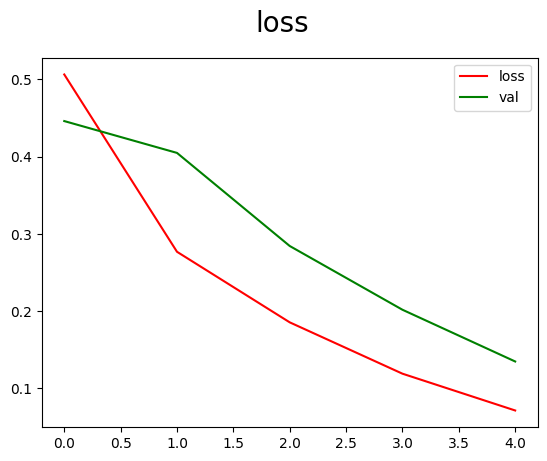

In [45]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='green',label='val')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

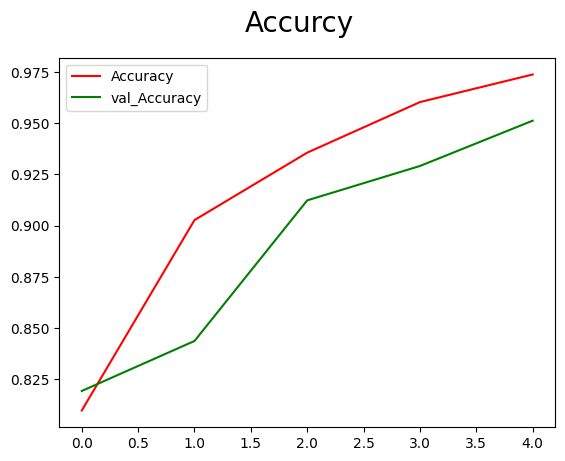

In [46]:
fig=plt.figure()
plt.plot(hist.history['Accuracy'],color='red',label='Accuracy')
plt.plot(hist.history['val_Accuracy'],color='green',label='val_Accuracy')
fig.suptitle('Accurcy',fontsize=20)
plt.legend(loc='upper left')
plt.show()